In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

# File to Load (Remember to Change These)
ccd = "Resources/output_data.csv"

# Read Purchasing File and store into Pandas data frame
clean_city_data = pd.read_csv(ccd)

In [2]:
clean_city_data

,Unnamed: 0,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Severo-Kurilsk,RU,1619221269,50.6789,156.1250,2.92,88,97,3.47,overcast clouds
1,1,Atuona,PF,1619220978,-9.8000,-139.0333,26.85,79,28,9.99,scattered clouds
2,2,Ardakan,IR,1619221590,32.3100,54.0175,26.00,18,40,2.06,scattered clouds
3,3,Mar Del Plata,AR,1619221328,-38.0023,-57.5575,20.56,83,0,4.12,moderate rain
4,4,Pyaozerskiy,RU,1619221590,65.8333,31.1667,0.57,99,100,1.39,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...
540,548,Pereslavl-Zalesskiy,RU,1619221715,56.7393,38.8563,6.00,95,98,1.49,light rain
541,549,Nuevo Progreso,MX,1619221715,23.1667,-97.9500,28.89,63,38,3.13,scattered clouds
542,550,Ferkessedougou,CI,1619221715,9.6000,-5.2000,28.44,44,78,1.75,broken clouds
543,552,Salalah,OM,1619221363,17.0151,54.0924,28.00,74,40,1.54,scattered clouds


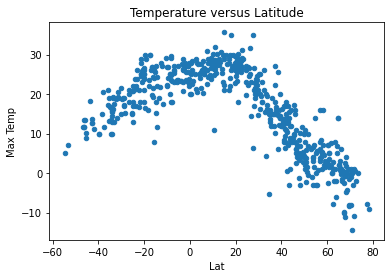

In [3]:
# Draw a scatter plot

clean_city_data.plot.scatter(x='Lat', y='Max Temp', title= "Temperature versus Latitude");

plt.show(block=True);

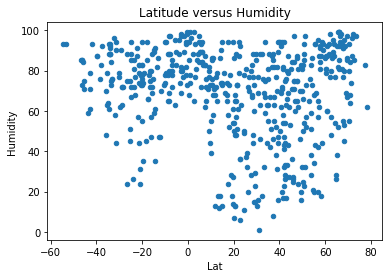

In [4]:
clean_city_data.plot.scatter(x='Lat', y='Humidity', title= "Latitude versus Humidity");

plt.show(block=True);

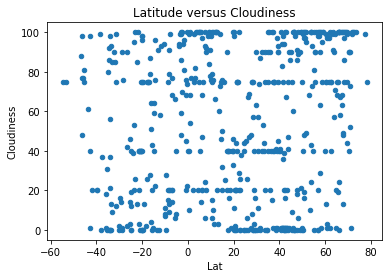

In [5]:
clean_city_data.plot.scatter(x='Lat', y='Cloudiness', title= "Latitude versus Cloudiness");

plt.show(block=True);

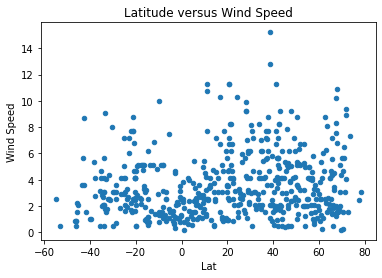

In [6]:
clean_city_data.plot.scatter(x='Lat', y='Wind Speed', title= "Latitude versus Wind Speed");

plt.show(block=True);

In [7]:
nh_df = clean_city_data[clean_city_data.Lat >= 0]
nh_df

,Unnamed: 0,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Severo-Kurilsk,RU,1619221269,50.6789,156.1250,2.92,88,97,3.47,overcast clouds
2,2,Ardakan,IR,1619221590,32.3100,54.0175,26.00,18,40,2.06,scattered clouds
4,4,Pyaozerskiy,RU,1619221590,65.8333,31.1667,0.57,99,100,1.39,overcast clouds
7,7,Butaritari,KI,1619221214,3.0707,172.7902,27.85,77,82,3.95,light rain
11,11,Avera,US,1619221257,33.1940,-82.5271,20.00,32,40,2.57,scattered clouds
...,...,...,...,...,...,...,...,...,...,...,...
539,547,Brae,GB,1619221714,60.3964,-1.3530,7.00,81,75,0.84,broken clouds
540,548,Pereslavl-Zalesskiy,RU,1619221715,56.7393,38.8563,6.00,95,98,1.49,light rain
541,549,Nuevo Progreso,MX,1619221715,23.1667,-97.9500,28.89,63,38,3.13,scattered clouds
542,550,Ferkessedougou,CI,1619221715,9.6000,-5.2000,28.44,44,78,1.75,broken clouds


In [8]:
sh_df = clean_city_data[clean_city_data.Lat < 0]
sh_df

,Unnamed: 0,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
1,1,Atuona,PF,1619220978,-9.8000,-139.0333,26.85,79,28,9.99,scattered clouds
3,3,Mar Del Plata,AR,1619221328,-38.0023,-57.5575,20.56,83,0,4.12,moderate rain
5,5,Busselton,AU,1619221263,-33.6500,115.3333,16.11,75,93,1.79,overcast clouds
6,6,Cidreira,BR,1619221252,-30.1811,-50.2056,21.54,79,2,8.04,clear sky
8,8,Rikitea,PF,1619221200,-23.1203,-134.9692,26.09,68,100,7.15,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...
517,525,Menongue,AO,1619221709,-14.6585,17.6910,15.27,59,64,1.17,broken clouds
520,528,Villa Maria,AR,1619221709,-32.4075,-63.2402,18.89,96,90,1.79,overcast clouds
521,529,Christchurch,NZ,1619221523,-43.5333,172.6333,18.33,59,61,3.60,broken clouds
529,537,Pangkalanbuun,ID,1619221712,-2.6833,111.6167,26.20,81,70,1.15,broken clouds


In [9]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_temp = nh_df ['Max Temp']
y_lat = nh_df ['Lat']

corr = round (st.pearsonr(x_temp,y_lat) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_temp,y_lat)
r_values = weight_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))

plt.scatter(x_temp,y_lat)
plt.plot(x_temp,r_values, "black")
plt.annotate(line_eq,(20,40),fontsize=16,color="black")
plt.annotate(f'r = {corr}',(20,40),fontsize=16,color="black")
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_temp,y_lat)[0],2)}")

NameError: name 'st' is not defined